###**CAR SALES PREDICTION**

### Importing required Libraries and Checking the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Data Preprocessing

In [ ]:
saledata = pd.read_csv("/content/car_purchasing.csv", encoding='latin1')

In [ ]:
rows, columns = saledata.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 500
Number of Columns: 9


In [ ]:
saledata.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
print(saledata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


In [ ]:
saledata.isnull()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [ ]:
saledata.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

### *** Drop Unnecessary Columns***

In [ ]:
drop_col = saledata.drop(["customer name","customer e-mail"],axis=1)

In [ ]:
drop_col.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Label Encoding

In [ ]:
label_encoder = LabelEncoder()
saledata['country_encoded'] = label_encoder.fit_transform(saledata['country'])
print(saledata[['country', 'country_encoded']].head())
saledata.drop('country', axis=1, inplace=True)

        country  country_encoded
0      Bulgaria               27
1        Belize               17
2       Algeria                1
3  Cook Islands               41
4        Brazil               26


In [ ]:
saledata.head()

,customer name,customer e-mail,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_encoded
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,27
1,Harlan Barnes,eu.dolor@diam.co.uk,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,17
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,1
3,Jade Cunningham,malesuada@dignissim.com,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,41
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,26


In [ ]:
saledata = saledata[['age', 'annual Salary', 'credit card debt', 'net worth', 'country_encoded', 'gender', 'car purchase amount']]
saledata.head()

,age,annual Salary,credit card debt,net worth,country_encoded,gender,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,27,0,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,17,0,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,1,1,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,41,1,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,26,1,55915.46248


### Data Exploration

In [ ]:
saledata.describe()

,age,annual Salary,credit card debt,net worth,country_encoded,gender,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,102.682000,0.506000,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,60.388263,0.500465,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,0.000000,0.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,52.000000,0.000000,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,100.500000,1.000000,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,156.000000,1.000000,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,210.000000,1.000000,80000.000000


### Data Visualization

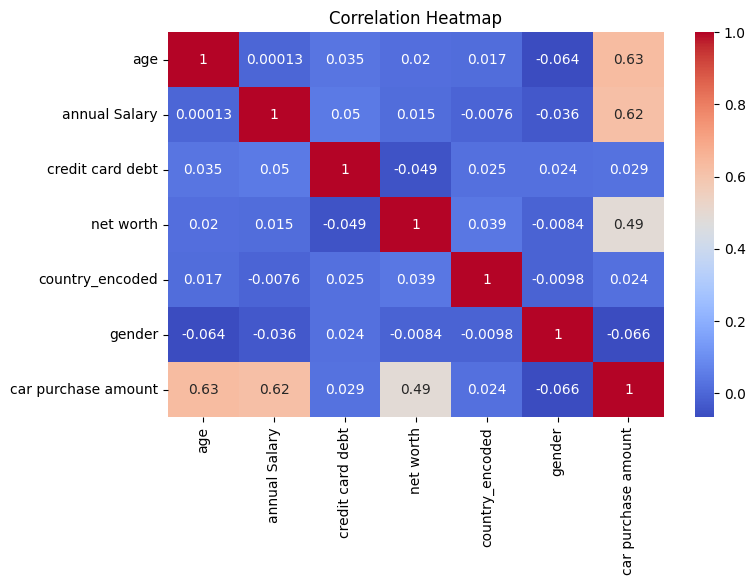

In [ ]:
correlation_matrix = saledata.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

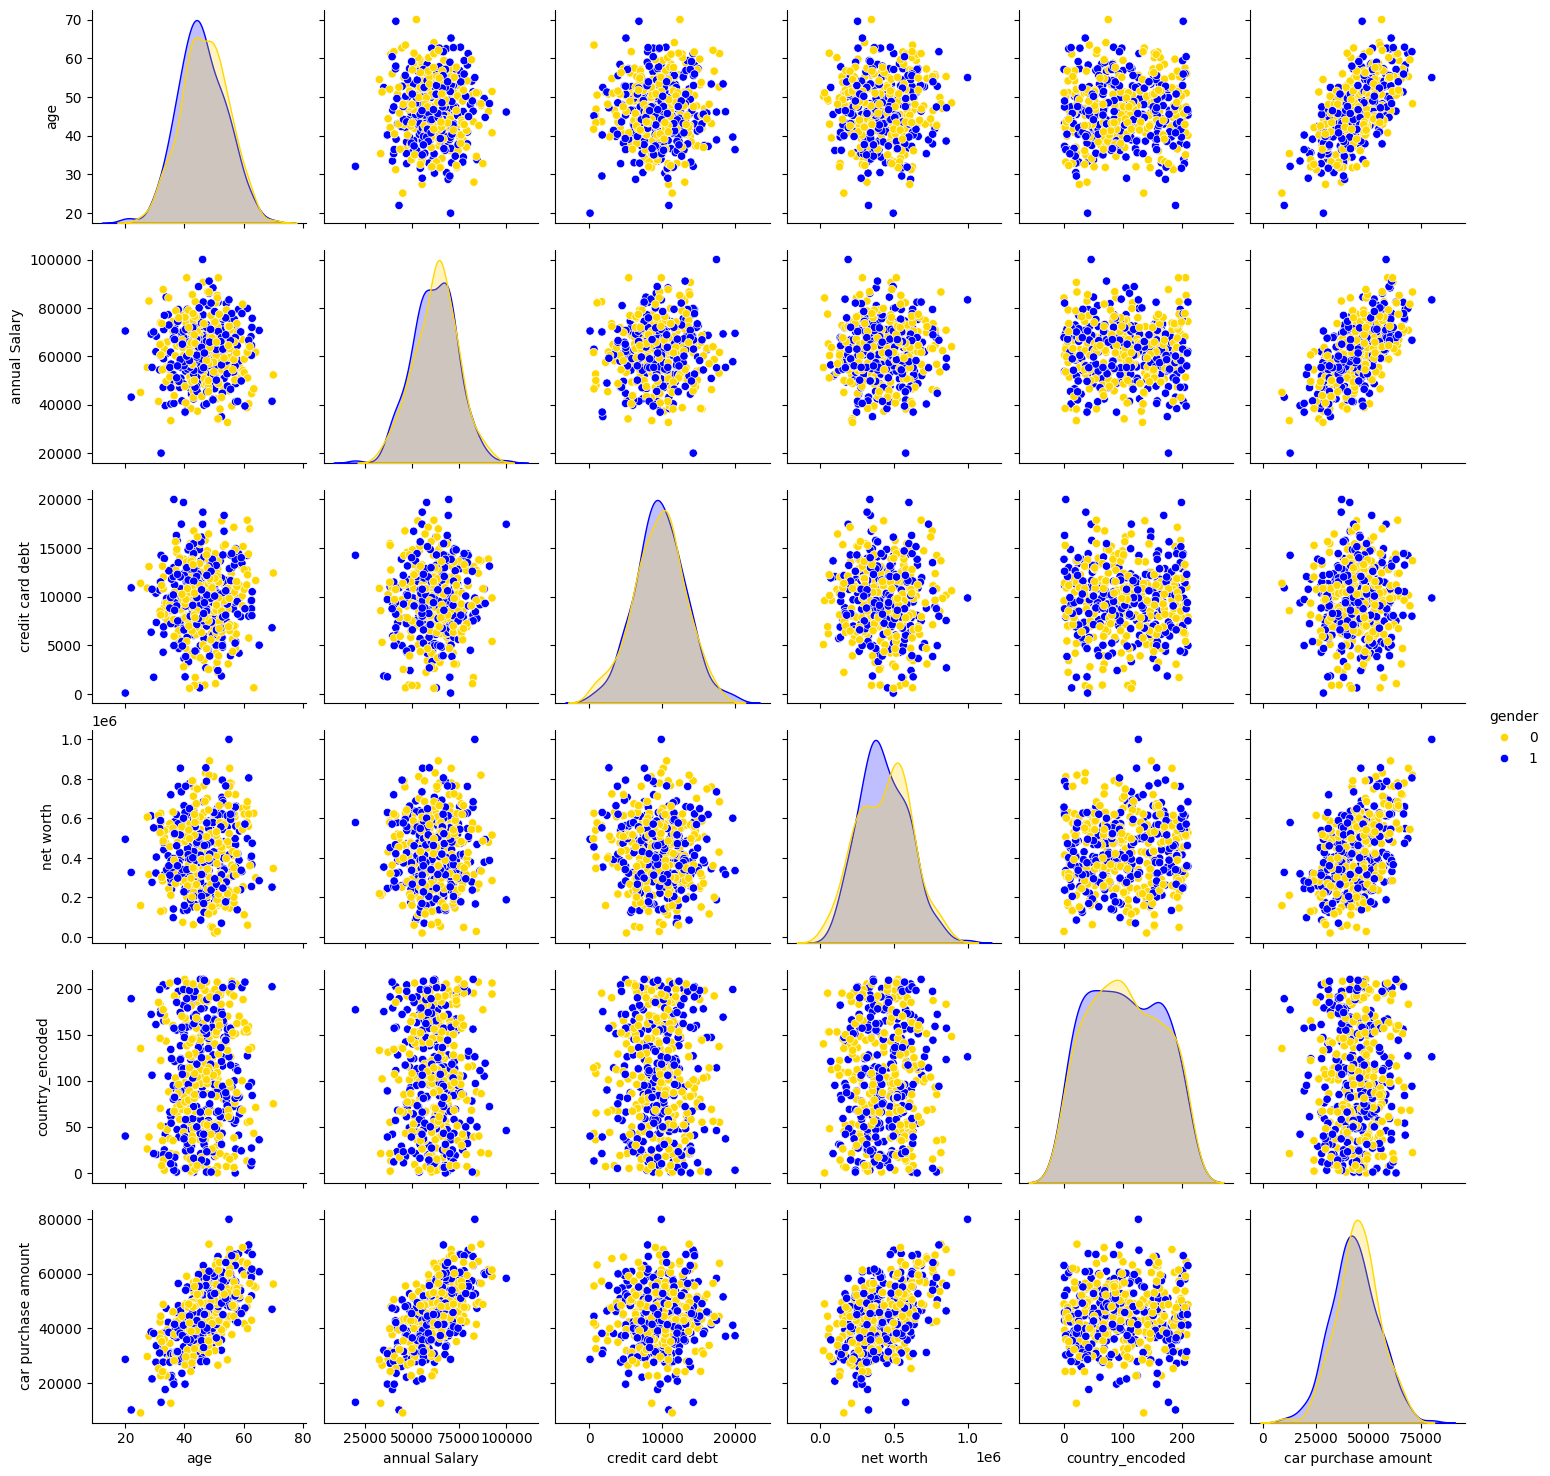

In [ ]:
custom_palette = {1: "blue", 0: "gold"}
sns.pairplot(saledata, hue="gender", palette=custom_palette)
plt.show()

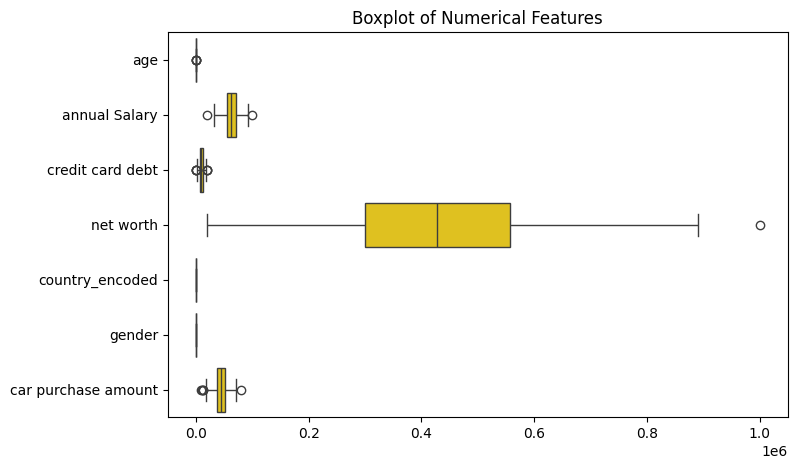

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=saledata, orient="h",color='gold')
plt.title("Boxplot of Numerical Features")
plt.show()

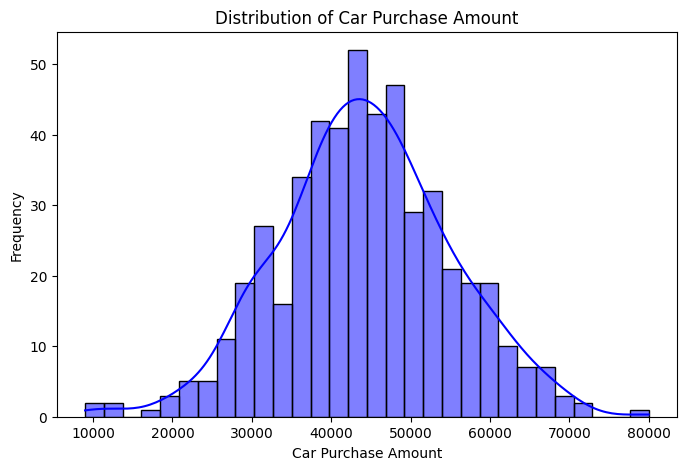

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(saledata["car purchase amount"], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()

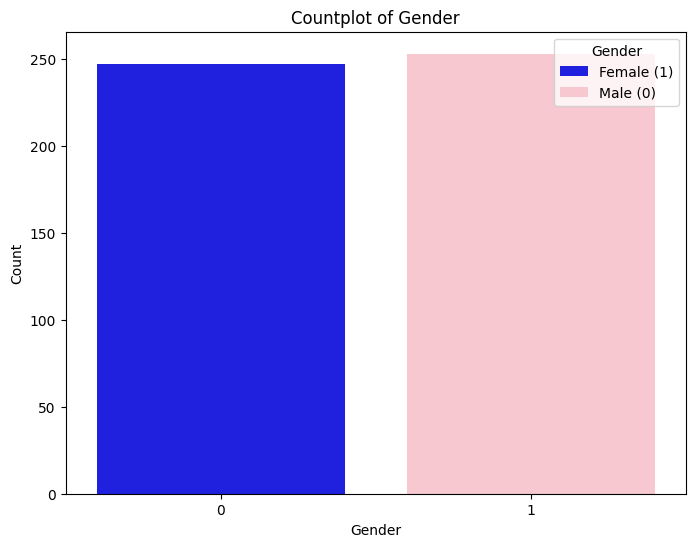

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=saledata, x="gender", hue="gender", palette={0: "blue", 1: "pink"})
plt.title("Countplot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Gender', labels={'Male (0)', 'Female (1)'})
plt.show()

### Dependent and In-Dependent Variable


In [ ]:
Y = saledata.iloc[:, -1]
X = saledata.iloc[:, :-1]

### 6. Splitting the Dataset for Test and Train
80% Training and 20% Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### 7. Performing Feature Scaling
Using Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Building an ANN Model



In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(6,)))
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1)
test_loss = model.evaluate(X_test, Y_test)
print("Mean Squared Error on Test Data:", test_loss)

Epoch 1/100
12/12 [==============================] - 3s 53ms/step - loss: 48520028.0000 - val_loss: 62613024.0000
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 46663624.0000 - val_loss: 59900632.0000
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 44965588.0000 - val_loss: 57472968.0000
Epoch 4/100
12/12 [==============================] - 0s 26ms/step - loss: 43372176.0000 - val_loss: 55101576.0000
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 41897840.0000 - val_loss: 52748884.0000
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 40468896.0000 - val_loss: 50632088.0000
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 39197208.0000 - val_loss: 48834808.0000
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 38006188.0000 - val_loss: 47121404.0000
Epoch 9/100
12/12 [==============================] - 0s 12ms/step - loss: 36905544.0000 

### Loss vs. Epochs Plot:


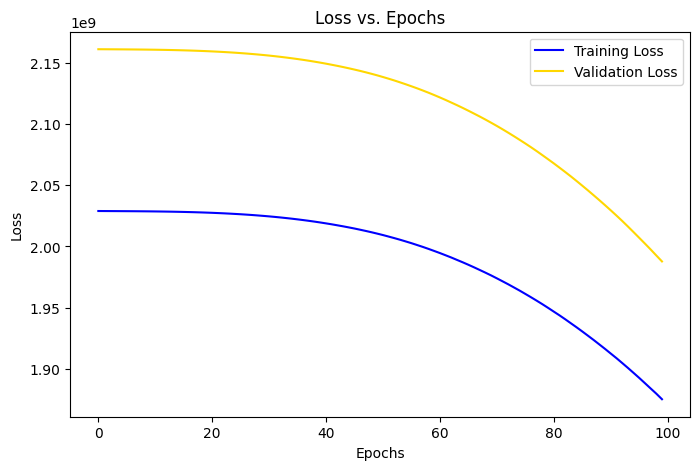

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss' , color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss' , color='gold')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



##### Predicting Car Purchase Amount for 10 Random Samples


In [ ]:

random_samples = {
    'age': [32, 45, 28, 38, 50, 42, 35, 55, 48, 30],
    'annual Salary': [72000, 82000, 55000, 95000, 110000, 75000, 63000, 98000, 105000, 68000],
    'credit card debt': [3000, 10000, 2000, 8000, 15000, 5000, 3000, 12000, 17000, 4000],
    'net worth': [40000, 60000, 35000, 75000, 90000, 55000, 42000, 80000, 95000, 38000],
    'country_encoded': [2, 1, 0, 3, 4, 2, 1, 3, 4, 0],
    'gender_encoded': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

random_df = pd.DataFrame(random_samples)

scaler = StandardScaler()

scaler.fit(X_train)

X_random_samples = scaler.transform(random_df)

predicted_amounts = model.predict(X_random_samples)

random_df['Predicted_Car_Purchase_Amount'] = predicted_amounts
print(random_df)


1/1 [==============================] - 0s 92ms/step
   age  annual Salary  credit card debt  net worth  country_encoded  \
0   32          72000              3000      40000                2   
1   45          82000             10000      60000                1   
2   28          55000              2000      35000                0   
3   38          95000              8000      75000                3   
4   50         110000             15000      90000                4   
5   42          75000              5000      55000                2   
6   35          63000              3000      42000                1   
7   55          98000             12000      80000                3   
8   48         105000             17000      95000                4   
9   30          68000              4000      38000                0   

   gender_encoded  Predicted_Car_Purchase_Amount  
0               1                     70310576.0  
1               0                     86903488.0  
2            

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
random_df

,age,annual Salary,credit card debt,net worth,country_encoded,gender_encoded,Predicted_Car_Purchase_Amount
0,32,72000,3000,40000,2,1,70310576.0
1,45,82000,10000,60000,1,0,86903488.0
2,28,55000,2000,35000,0,1,55173664.0
3,38,95000,8000,75000,3,0,102002416.0
4,50,110000,15000,90000,4,1,120911728.0
5,42,75000,5000,55000,2,0,78527040.0
6,35,63000,3000,42000,1,1,64090632.0
7,55,98000,12000,80000,3,0,107300200.0
8,48,105000,17000,95000,4,1,120186080.0
9,30,68000,4000,38000,0,0,66797816.0


The provided code predicts car purchase amounts for random samples using a trained Artificial Neural Network (ANN) model. Here's a concise summary:

1. **Random Samples**: Random samples representing individuals' features like age, salary, debt, net worth, country, and gender are generated.

2. **Prediction**: The ANN model predicts car purchase amounts for these samples based on their features.

3. **Output**: The predictions are added to the random samples DataFrame and printed.

4. **Conclusion**: These predictions can guide decisions like targeted marketing or personalized recommendations for car purchases, but should be interpreted as estimates due to model limitations and assumptions.